# 二重矢板の予測

In [66]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import preprocessing
import japanize_matplotlib

## 1.CSVファイルの読み込み

In [67]:
#データの読み込み
data_folder = input("データファイルのあるフォルダまでのパス")
data_folder = data_folder.rstrip()
data_folder = data_folder.replace("\\", "/") + "/"

file1 = data_folder + "train_data1.csv"
file2 = data_folder + "train_labels.csv"

df1 = pd.read_csv(file1,encoding="cp932")
df2 = pd.read_csv(file2,encoding="cp932")

df = pd.concat([df1,df2],axis = 1)

In [68]:
pd.set_option('display.max_columns',30)
df.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,...,引張材直径,引張材材料番号,腹起し材質,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,...,35,1,1,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,...,67,0,1,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,...,28,1,0,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,...,90,1,1,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,...,40,1,1,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2


## ラベルエンコーディング

In [70]:
df['矢板型'] = df['矢板型'].apply(str)
df['矢板材料'] = df['矢板材料'].apply(str)

In [71]:
df = pd.get_dummies(df)
print(df.shape)

(8928, 38)


In [72]:
pd.set_option('display.max_columns',35)
df.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,...,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6,1,0,0,0,1
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,...,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5,0,1,0,0,1
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,...,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1,0,0,1,0,1
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,...,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3,1,0,0,1,0
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,...,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2,1,0,0,0,1


## 相関を調べる

In [73]:
# 目的変数の設定
pur = "遮水効果"

In [74]:
sns.set(font='Yu Gothic',rc = {'figure.figsize':(200,200)})
sns.heatmap(df.corr(),square=True, vmax=1, vmin=-1, center=0,cmap='coolwarm')

<AxesSubplot:>

<AxesSubplot:>

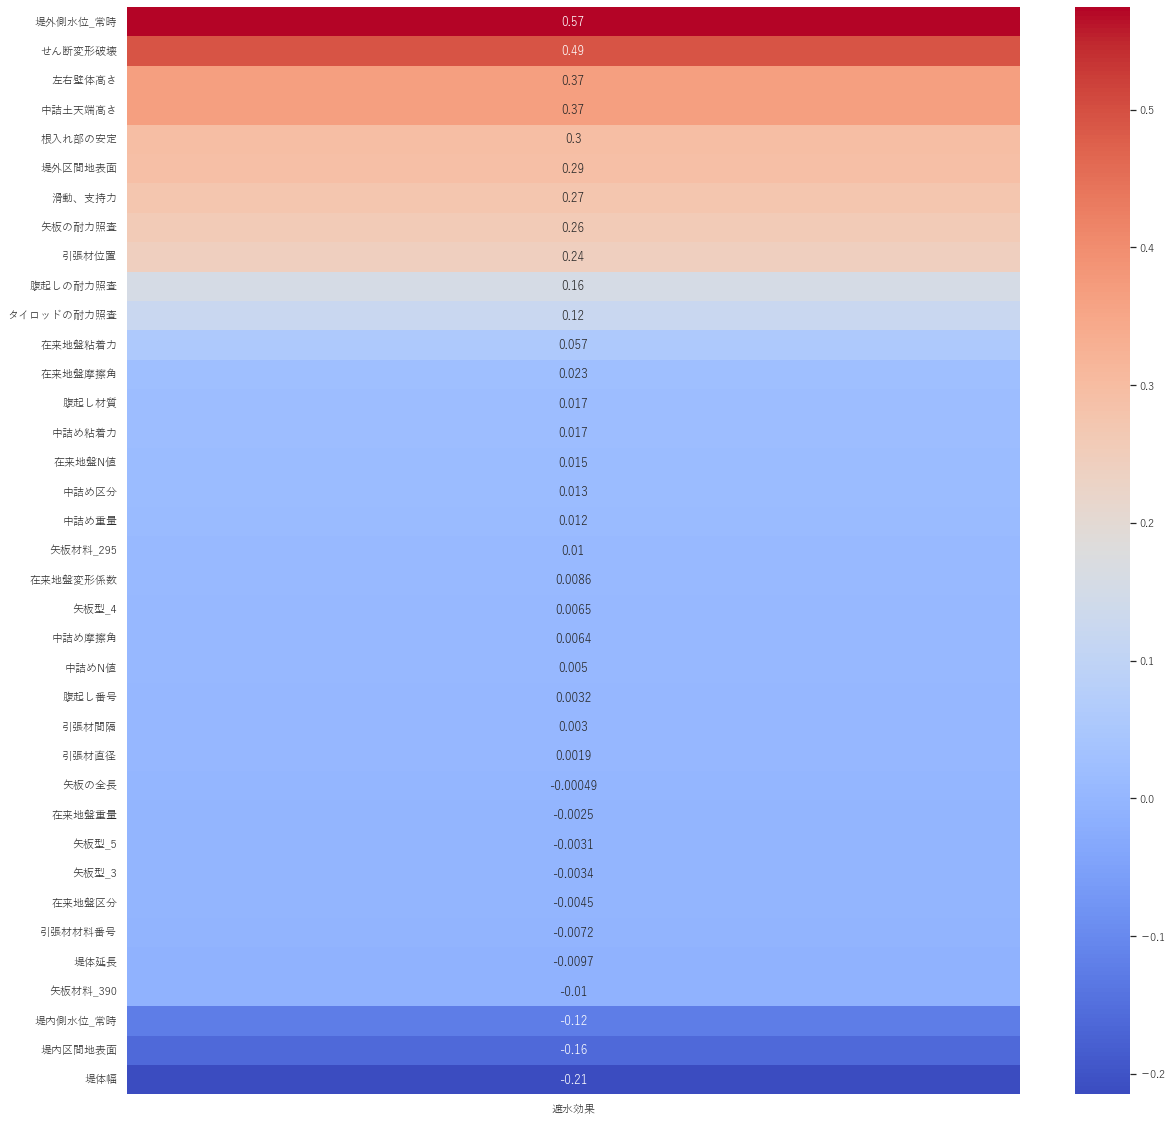

In [75]:
sns.set(font='Yu Gothic',rc = {'figure.figsize':(20,20)})
sns.heatmap(df.corr()[[pur]].sort_values(by=pur, ascending=False)[1:],cmap='coolwarm', annot=True)

In [10]:
df

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,...,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6,1,0,0,0,1
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,...,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5,0,1,0,0,1
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,...,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1,0,0,1,0,1
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,...,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3,1,0,0,1,0
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,...,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,25,9.2,8.1,8.0,2.3,0.0,1.6,18,1,38,12,96,75100,13,0,1,43,...,5.2,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,10.9,7.5,4,1,0,0,1,0
8924,29,10.4,5.4,5.3,1.5,0.0,0.8,12,1,48,26,134,15200,14,1,12,36,...,2.1,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,14.1,4.3,3,1,0,0,0,1
8925,19,7.7,4.2,4.1,1.6,0.0,1.6,15,0,32,40,270,194100,11,1,19,3,...,3.0,0.0,0.020281,0.027162,0.014428,0.384615,0.022222,0.023256,0.007143,13.2,3.0,6,0,1,0,1,0
8926,11,11.5,4.3,4.2,1.6,0.0,0.8,18,1,12,37,85,14400,12,1,2,26,...,3.0,0.0,0.011119,0.048622,0.019118,0.371156,0.066667,0.078431,0.014286,11.9,2.0,4,0,0,1,1,0


## モデルの作成

### データの分割

In [76]:
# データの分割
# 全体の30%をテストデータに設定

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state = 3)

### 交差検証

In [77]:
# Stratified K Foldでデータを分割
from imblearn.under_sampling import RandomUnderSampler
# 目的変数と説明変数に分ける
X = train.drop([pur], axis = 1) # 予測対象以外を説明変数に設定
y = train.loc[:,pur]

# データの分割
# ライブラリのインポート
from sklearn.model_selection import KFold

fold = KFold(n_splits=5, shuffle=True, random_state=3) # データを5分割する
kf = fold.split(X, y)
kf_cv = list(kf)

In [78]:
for i, (idx_train, idx_val) in enumerate(kf_cv):
    print(f'fold {i}')
    print(idx_train)
    print(idx_val)
    print('=='*30)
    print(len(idx_train), len(idx_val)) #5分割しているのでデータ数が1:4になるか確認する
    print('=='*30)

fold 0
[   1    2    3 ... 7139 7140 7141]
[   0   10   17 ... 7117 7124 7128]
5713 1429
fold 1
[   0    1    2 ... 7138 7140 7141]
[   6    8    9 ... 7133 7137 7139]
5713 1429
fold 2
[   0    1    2 ... 7139 7140 7141]
[   3    4    5 ... 7130 7134 7136]
5714 1428
fold 3
[   0    3    4 ... 7136 7137 7139]
[   1    2   11 ... 7138 7140 7141]
5714 1428
fold 4
[   0    1    2 ... 7139 7140 7141]
[   7   13   14 ... 7120 7121 7135]
5714 1428


## xgboost

In [79]:
# from xgboost.callback import early_stop
import xgboost as xgb
from sklearn import metrics # 正解率を出すためのライブラリ
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score

### ハイパーパラメータチューニング

In [80]:
import optuna
def objective(trial,df_X,df_y):
    
    params ={
    'max_depth':trial.suggest_int("max_depth",1,10),
    'min_child_weight':trial.suggest_int('min_child_weight',1,15),
    'gamma':trial.suggest_uniform('gamma',0,5),
    'subsample':trial.suggest_uniform('subsample',0,1),
    'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.5,1),
    'reg_alpha':trial.suggest_uniform('subsample',0,1),
    'reg_lambda':trial.suggest_uniform('subsample',0,1),
    'learning_rate':trial.suggest_uniform('learning_rate',0,1) 
    }

    model = xgb.XGBRegressor(n_estimators=100,
                            verbosity=0,
                            n_jobs=-1,
                            random_state=42,
                            **params)

    #交差検証
    scores = cross_val_score(model, df_X, df_y, scoring='neg_mean_squared_error',cv=5)
    rmse = np.sqrt(-scores)
    score_mean = np.mean(rmse)

    return score_mean

In [81]:
#optuna.create_study()でoptuna.studyインスタンスを作る。
study = optuna.create_study()

#studyインスタンスのoptimize()に作った関数を渡して最適化する。
study.optimize(lambda trial: objective(trial,X,y),n_trials=200, timeout=300)

[I 2022-08-18 11:33:19,076] A new study created in memory with name: no-name-4531176b-5683-40b0-bb57-c0610e9a0122
[I 2022-08-18 11:33:20,062] Trial 0 finished with value: 0.22945126795095544 and parameters: {'max_depth': 6, 'min_child_weight': 12, 'gamma': 2.269989115866893, 'subsample': 0.3192219316219599, 'colsample_bytree': 0.8963968969989693, 'learning_rate': 0.7298869502329732}. Best is trial 0 with value: 0.22945126795095544.
[I 2022-08-18 11:33:21,262] Trial 1 finished with value: 0.20384193613328802 and parameters: {'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.8238558383386607, 'subsample': 0.9677161066903158, 'colsample_bytree': 0.8210119491180643, 'learning_rate': 0.6269415261733825}. Best is trial 1 with value: 0.20384193613328802.
[I 2022-08-18 11:33:22,062] Trial 2 finished with value: 0.20451384636300457 and parameters: {'max_depth': 3, 'min_child_weight': 11, 'gamma': 2.0625023931730784, 'subsample': 0.9123834996033638, 'colsample_bytree': 0.8803913278701776, 'learn

In [82]:
#スコアを見る
print(study.best_params)    

{'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.0007763956024202656, 'subsample': 0.8639435608562221, 'colsample_bytree': 0.9537270010385148, 'learning_rate': 0.11151867040530758}


In [83]:
print(study.best_value)

0.16148766986323165


In [84]:
xgb_params = {
    'objective': 'reg:squarederror',  # 回帰問題
    'eval_metric': 'rmse',       # 学習用の指標
}

In [85]:
xgb_params['max_depth'] = study.best_params['max_depth']
xgb_params['min_child_weight'] = study.best_params['min_child_weight']
xgb_params['gamma'] = study.best_params['gamma']
xgb_params['subsample'] = study.best_params['subsample']
xgb_params['colsample_bytree'] = study.best_params['colsample_bytree']
xgb_params['learning_rate'] = study.best_params['learning_rate']
# xgb_params['reg_alpha'] = study.best_params['reg_alpha']
# xgb_params['reg_lambda'] = study.best_params['reg_lambda']

### 学習開始

In [99]:
from sklearn.metrics import average_precision_score,mean_absolute_error
import shap

def fit_xgb(X, y, cv, params: dict=None):
    models = []
    ma = []
    oof = np.zeros(len(X))
    # oof_classfication = np.zeros(len(X))

    if params is None:
        params = {}

    threshold_all = []
    for i, (idx_train, idx_val) in enumerate(kf_cv):
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train] # 学習用の説明変数と目的変数の呼び出し
        X_val, y_val = X.iloc[idx_val], y.iloc[idx_val]

        reg = xgb.XGBRegressor(**params)
        model = reg.fit(X_train, y_train,
                        eval_set=[(X_val, y_val)],  
                        early_stopping_rounds=20,
                        verbose = 2)

        pred = model.predict(X_val)
        oof[idx_val] = pred

        # acc.append(metrics.accuracy_score(y_val, pred))
        models.append(model)
        
        explainer = shap.TreeExplainer(model = model,data=X_train,feature_perturbation="interventional")
        shap_values = explainer(X_train)
        shap.plots.bar(shap_values=shap_values,max_display=40)
        shap.plots.beeswarm(shap_values,max_display=40)
        
        print('r2_train:',reg.score(X_train, y_train))
        print('r2_val:',reg.score(X_val, y_val))
        print('MAE_val: ',mean_absolute_error(y_val, pred))
        ma.append(metrics.mean_absolute_error(y_val, pred))

    print(f'平均のMAE：{np.mean(ma)}')
    return oof, models

[0]	validation_0-rmse:0.43359
[2]	validation_0-rmse:0.37401
[4]	validation_0-rmse:0.33033
[6]	validation_0-rmse:0.29866
[8]	validation_0-rmse:0.27121
[10]	validation_0-rmse:0.25158
[12]	validation_0-rmse:0.23737
[14]	validation_0-rmse:0.22670
[16]	validation_0-rmse:0.21698
[18]	validation_0-rmse:0.21020
[20]	validation_0-rmse:0.20488
[22]	validation_0-rmse:0.20024
[24]	validation_0-rmse:0.19627
[26]	validation_0-rmse:0.19454
[28]	validation_0-rmse:0.19113
[30]	validation_0-rmse:0.18867
[32]	validation_0-rmse:0.18702
[34]	validation_0-rmse:0.18549
[36]	validation_0-rmse:0.18383
[38]	validation_0-rmse:0.18294
[40]	validation_0-rmse:0.18145
[42]	validation_0-rmse:0.18059
[44]	validation_0-rmse:0.18002


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[46]	validation_0-rmse:0.17881
[48]	validation_0-rmse:0.17865
[50]	validation_0-rmse:0.17766
[52]	validation_0-rmse:0.17660
[54]	validation_0-rmse:0.17586
[56]	validation_0-rmse:0.17534
[58]	validation_0-rmse:0.17459
[60]	validation_0-rmse:0.17441
[62]	validation_0-rmse:0.17408
[64]	validation_0-rmse:0.17381
[66]	validation_0-rmse:0.17353
[68]	validation_0-rmse:0.17304
[70]	validation_0-rmse:0.17235
[72]	validation_0-rmse:0.17202
[74]	validation_0-rmse:0.17188
[76]	validation_0-rmse:0.17162
[78]	validation_0-rmse:0.17151
[80]	validation_0-rmse:0.17124
[82]	validation_0-rmse:0.17105
[84]	validation_0-rmse:0.17074
[86]	validation_0-rmse:0.17065
[88]	validation_0-rmse:0.17049
[90]	validation_0-rmse:0.17051
[92]	validation_0-rmse:0.17043
[94]	validation_0-rmse:0.17046
[96]	validation_0-rmse:0.17042
[98]	validation_0-rmse:0.17011
[99]	validation_0-rmse:0.16997


 95%|=================== | 5438/5713 [00:17<00:00]       

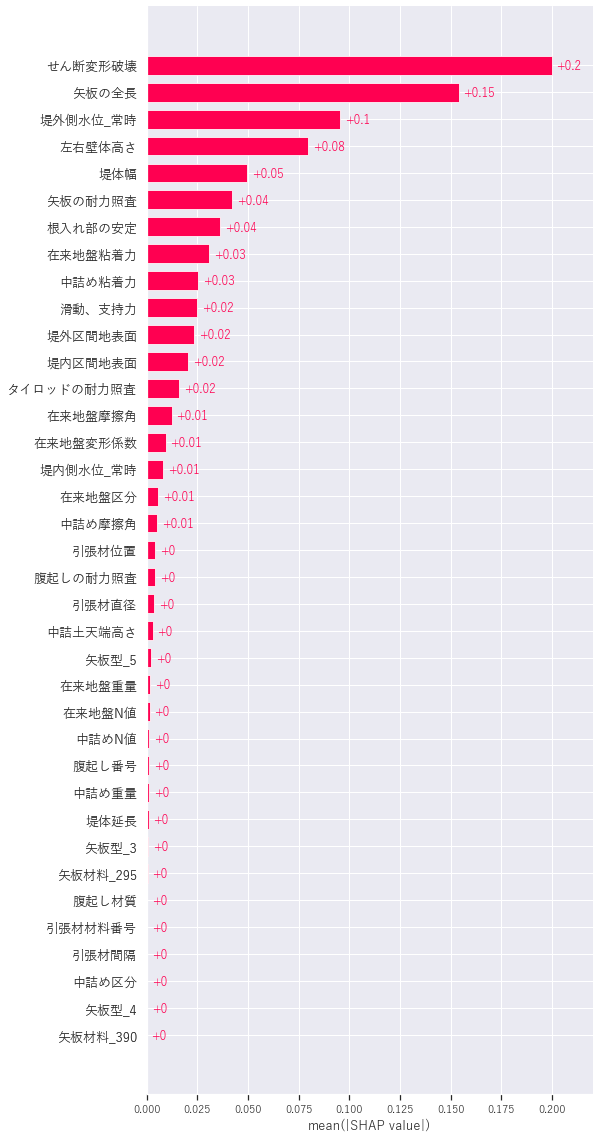

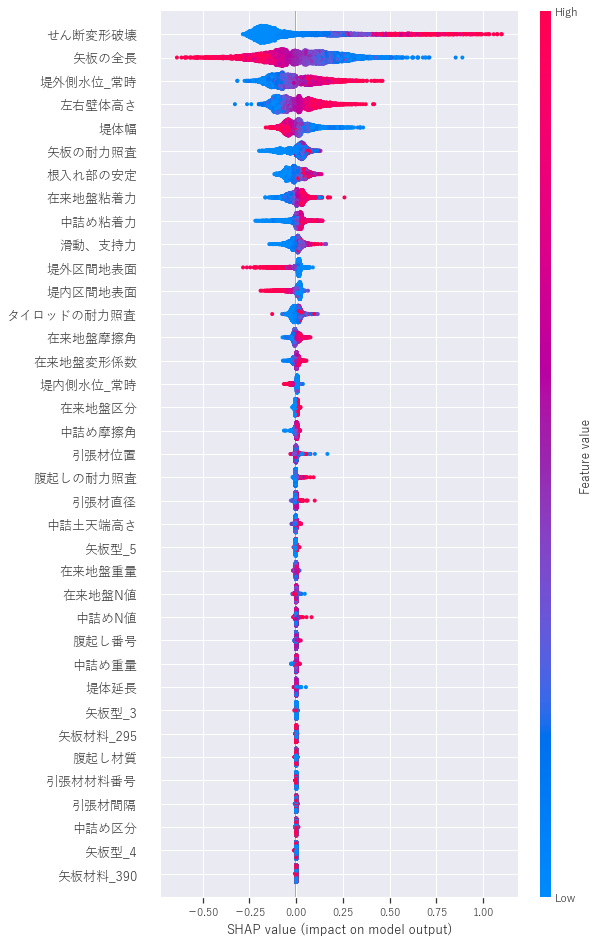

r2_train: 0.9828823695937671
r2_val: 0.8673684450583437
MAE_val:  0.08596739918193969
[0]	validation_0-rmse:0.43630
[2]	validation_0-rmse:0.37679
[4]	validation_0-rmse:0.33339
[6]	validation_0-rmse:0.30197
[8]	validation_0-rmse:0.27605
[10]	validation_0-rmse:0.25651
[12]	validation_0-rmse:0.24151
[14]	validation_0-rmse:0.22901
[16]	validation_0-rmse:0.21915
[18]	validation_0-rmse:0.21106
[20]	validation_0-rmse:0.20572
[22]	validation_0-rmse:0.20185
[24]	validation_0-rmse:0.19742
[26]	validation_0-rmse:0.19409
[28]	validation_0-rmse:0.19129
[30]	validation_0-rmse:0.18919
[32]	validation_0-rmse:0.18691
[34]	validation_0-rmse:0.18535
[36]	validation_0-rmse:0.18366
[38]	validation_0-rmse:0.18239
[40]	validation_0-rmse:0.18171
[42]	validation_0-rmse:0.18080
[44]	validation_0-rmse:0.17993


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[46]	validation_0-rmse:0.17891
[48]	validation_0-rmse:0.17802
[50]	validation_0-rmse:0.17735
[52]	validation_0-rmse:0.17685
[54]	validation_0-rmse:0.17628
[56]	validation_0-rmse:0.17552
[58]	validation_0-rmse:0.17527
[60]	validation_0-rmse:0.17467
[62]	validation_0-rmse:0.17437
[64]	validation_0-rmse:0.17400
[66]	validation_0-rmse:0.17378
[68]	validation_0-rmse:0.17314
[70]	validation_0-rmse:0.17253
[72]	validation_0-rmse:0.17209
[74]	validation_0-rmse:0.17167
[76]	validation_0-rmse:0.17137
[78]	validation_0-rmse:0.17134
[80]	validation_0-rmse:0.17119
[82]	validation_0-rmse:0.17111
[84]	validation_0-rmse:0.17072
[86]	validation_0-rmse:0.17020
[88]	validation_0-rmse:0.16991
[90]	validation_0-rmse:0.16971
[92]	validation_0-rmse:0.16953
[94]	validation_0-rmse:0.16946
[96]	validation_0-rmse:0.16916
[98]	validation_0-rmse:0.16911
[99]	validation_0-rmse:0.16904


 96%|=================== | 5461/5713 [00:16<00:00]       

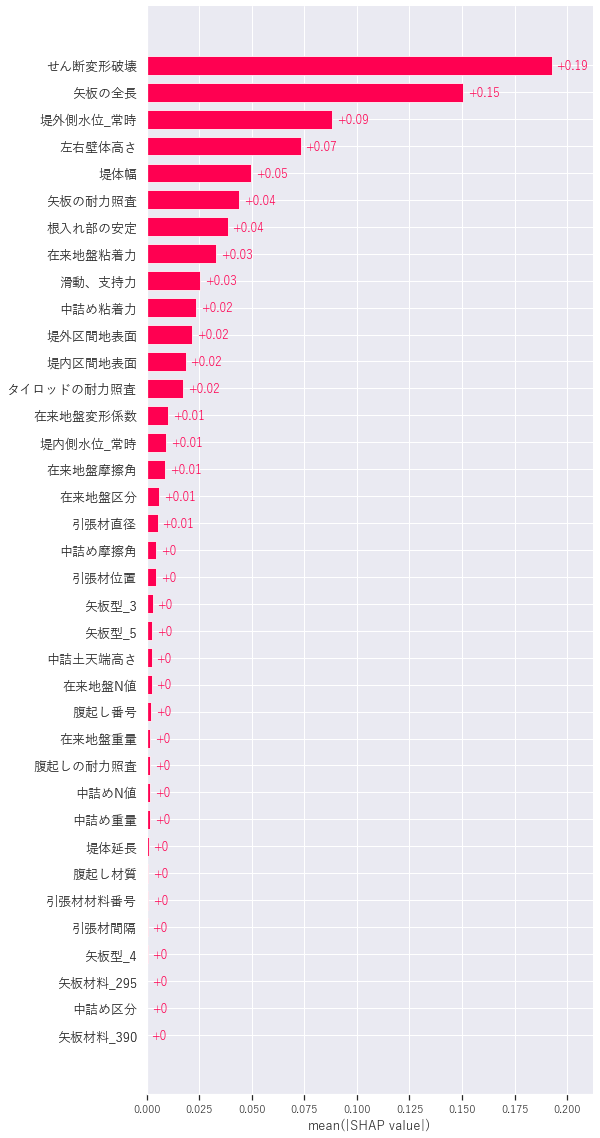

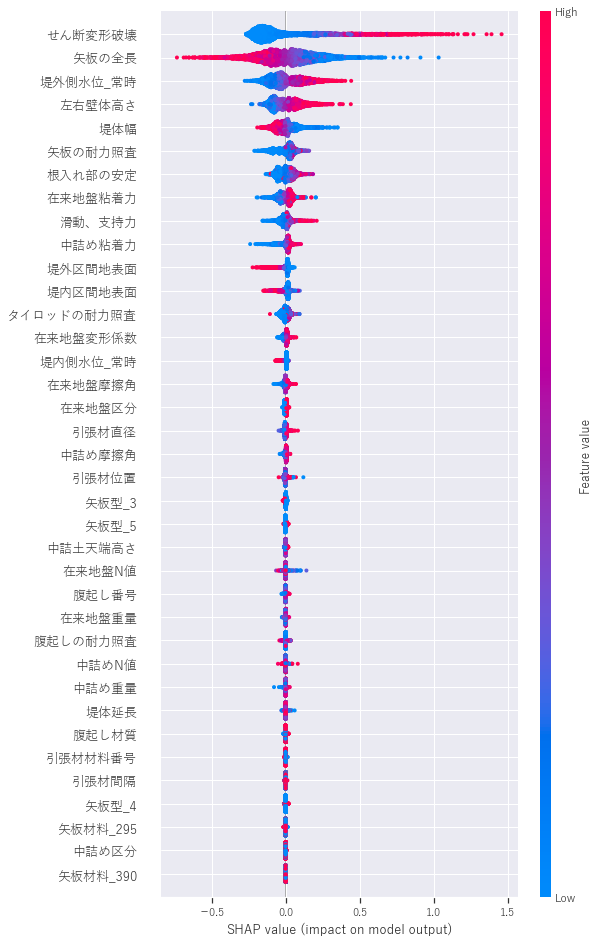

r2_train: 0.982411130199396
r2_val: 0.8682485727377443
MAE_val:  0.09506282774507967
[0]	validation_0-rmse:0.40706
[2]	validation_0-rmse:0.34836
[4]	validation_0-rmse:0.30430
[6]	validation_0-rmse:0.27076
[8]	validation_0-rmse:0.24478
[10]	validation_0-rmse:0.22685
[12]	validation_0-rmse:0.21281
[14]	validation_0-rmse:0.20086
[16]	validation_0-rmse:0.19276
[18]	validation_0-rmse:0.18612
[20]	validation_0-rmse:0.18106
[22]	validation_0-rmse:0.17652
[24]	validation_0-rmse:0.17234
[26]	validation_0-rmse:0.16863
[28]	validation_0-rmse:0.16496
[30]	validation_0-rmse:0.16265
[32]	validation_0-rmse:0.16022
[34]	validation_0-rmse:0.15792
[36]	validation_0-rmse:0.15664
[38]	validation_0-rmse:0.15529
[40]	validation_0-rmse:0.15434
[42]	validation_0-rmse:0.15310
[44]	validation_0-rmse:0.15200
[46]	validation_0-rmse:0.15122


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[48]	validation_0-rmse:0.15040
[50]	validation_0-rmse:0.14960
[52]	validation_0-rmse:0.14930
[54]	validation_0-rmse:0.14874
[56]	validation_0-rmse:0.14798
[58]	validation_0-rmse:0.14780
[60]	validation_0-rmse:0.14700
[62]	validation_0-rmse:0.14666
[64]	validation_0-rmse:0.14624
[66]	validation_0-rmse:0.14593
[68]	validation_0-rmse:0.14574
[70]	validation_0-rmse:0.14475
[72]	validation_0-rmse:0.14455
[74]	validation_0-rmse:0.14417
[76]	validation_0-rmse:0.14389
[78]	validation_0-rmse:0.14369
[80]	validation_0-rmse:0.14341
[82]	validation_0-rmse:0.14333
[84]	validation_0-rmse:0.14306
[86]	validation_0-rmse:0.14281
[88]	validation_0-rmse:0.14279
[90]	validation_0-rmse:0.14257
[92]	validation_0-rmse:0.14242
[94]	validation_0-rmse:0.14235
[96]	validation_0-rmse:0.14233
[98]	validation_0-rmse:0.14205
[99]	validation_0-rmse:0.14190


100%|===================| 5707/5714 [00:17<00:00]        

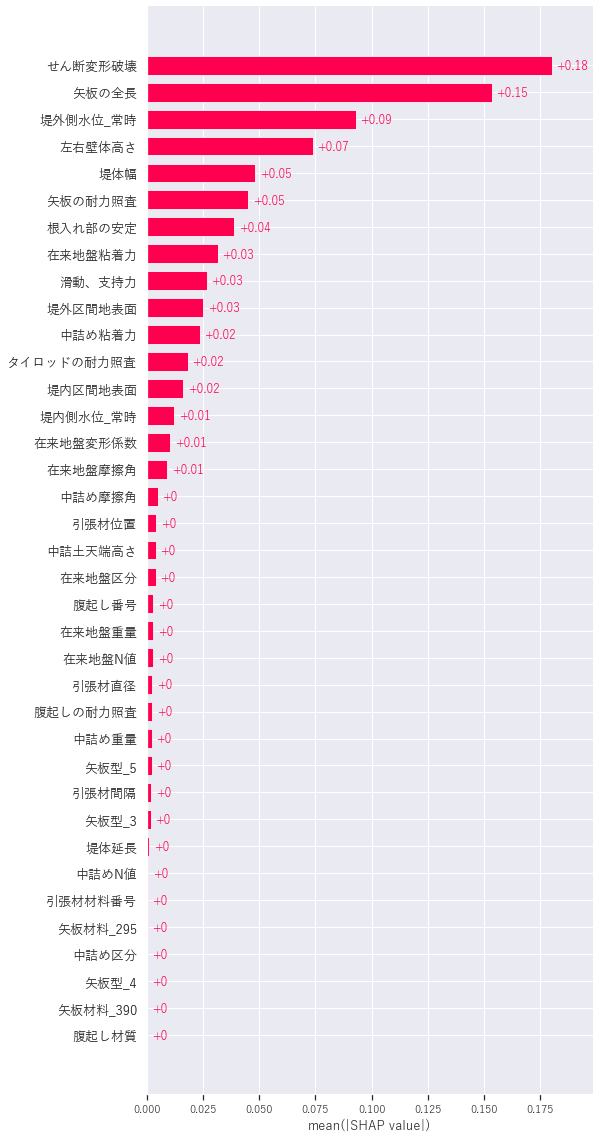

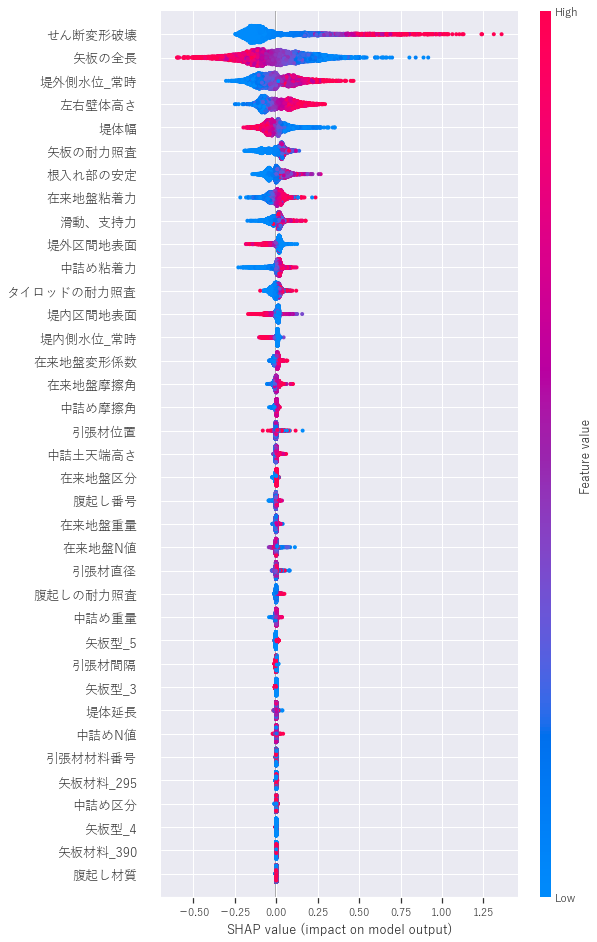

r2_train: 0.982642055766794
r2_val: 0.8969807159173295
MAE_val:  0.08192497011278377
[0]	validation_0-rmse:0.44143
[2]	validation_0-rmse:0.38334
[4]	validation_0-rmse:0.33968
[6]	validation_0-rmse:0.30536
[8]	validation_0-rmse:0.28105
[10]	validation_0-rmse:0.26172
[12]	validation_0-rmse:0.24661
[14]	validation_0-rmse:0.23558
[16]	validation_0-rmse:0.22568
[18]	validation_0-rmse:0.21841
[20]	validation_0-rmse:0.21333
[22]	validation_0-rmse:0.20867
[24]	validation_0-rmse:0.20412
[26]	validation_0-rmse:0.19976
[28]	validation_0-rmse:0.19703
[30]	validation_0-rmse:0.19450
[32]	validation_0-rmse:0.19141
[34]	validation_0-rmse:0.18939
[36]	validation_0-rmse:0.18751
[38]	validation_0-rmse:0.18589
[40]	validation_0-rmse:0.18450
[42]	validation_0-rmse:0.18321
[44]	validation_0-rmse:0.18184


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[46]	validation_0-rmse:0.18113
[48]	validation_0-rmse:0.18004
[50]	validation_0-rmse:0.17921
[52]	validation_0-rmse:0.17882
[54]	validation_0-rmse:0.17765
[56]	validation_0-rmse:0.17751
[58]	validation_0-rmse:0.17736
[60]	validation_0-rmse:0.17662
[62]	validation_0-rmse:0.17639
[64]	validation_0-rmse:0.17585
[66]	validation_0-rmse:0.17545
[68]	validation_0-rmse:0.17532
[70]	validation_0-rmse:0.17505
[72]	validation_0-rmse:0.17488
[74]	validation_0-rmse:0.17450
[76]	validation_0-rmse:0.17434
[78]	validation_0-rmse:0.17418
[80]	validation_0-rmse:0.17379
[82]	validation_0-rmse:0.17360
[84]	validation_0-rmse:0.17350
[86]	validation_0-rmse:0.17319
[88]	validation_0-rmse:0.17328
[90]	validation_0-rmse:0.17327
[92]	validation_0-rmse:0.17323
[94]	validation_0-rmse:0.17275
[96]	validation_0-rmse:0.17245
[98]	validation_0-rmse:0.17215
[99]	validation_0-rmse:0.17216


 96%|=================== | 5459/5714 [00:16<00:00]       

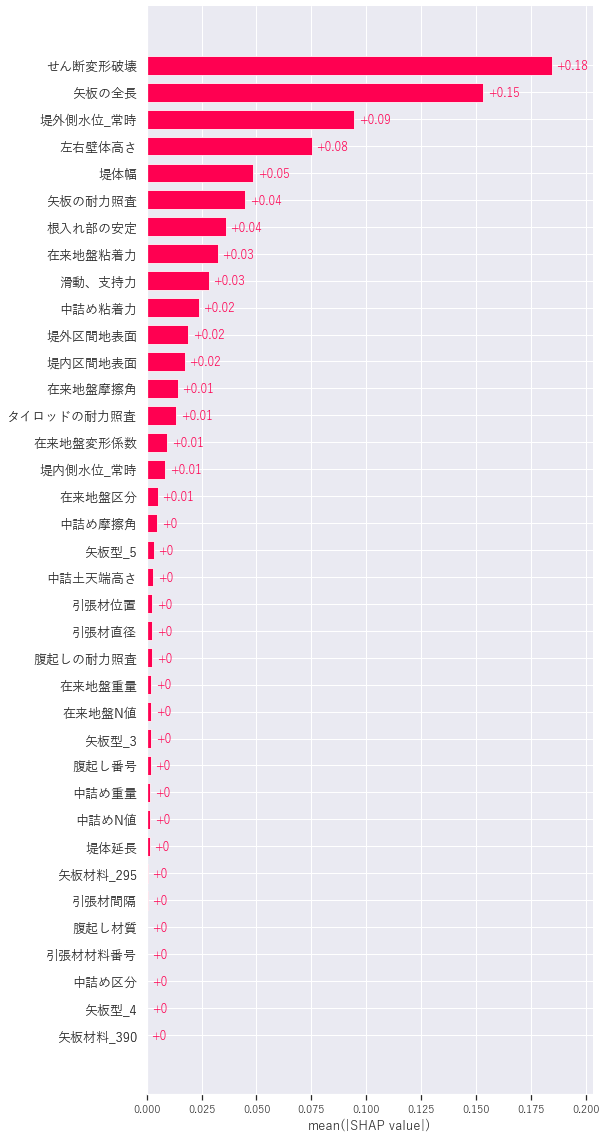

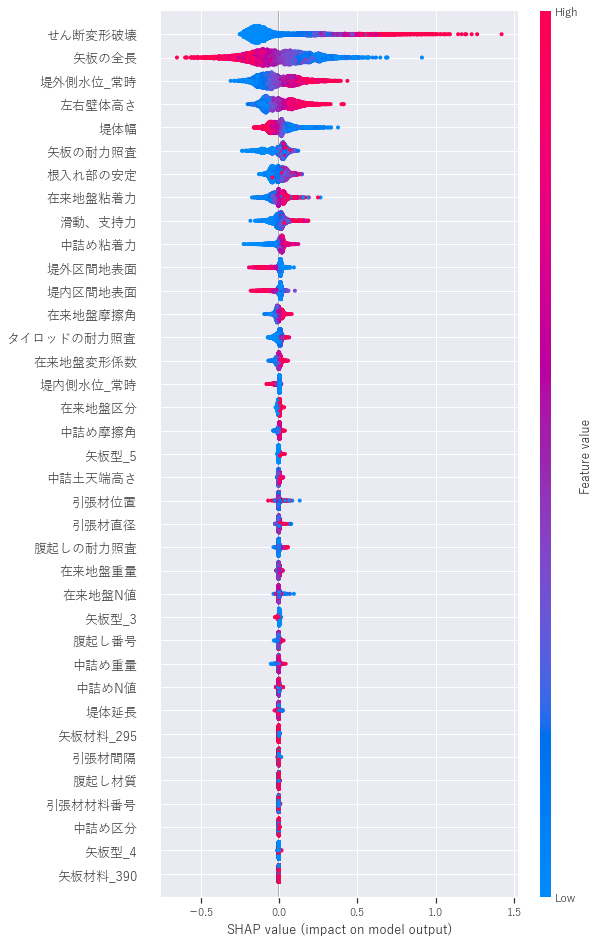

r2_train: 0.981070961271545
r2_val: 0.8671570197866889
MAE_val:  0.0908450052743422
[0]	validation_0-rmse:0.45071
[2]	validation_0-rmse:0.38725
[4]	validation_0-rmse:0.33709
[6]	validation_0-rmse:0.29938
[8]	validation_0-rmse:0.27277
[10]	validation_0-rmse:0.25075
[12]	validation_0-rmse:0.23645
[14]	validation_0-rmse:0.22329
[16]	validation_0-rmse:0.21460
[18]	validation_0-rmse:0.20714
[20]	validation_0-rmse:0.20125
[22]	validation_0-rmse:0.19649
[24]	validation_0-rmse:0.19207
[26]	validation_0-rmse:0.18845
[28]	validation_0-rmse:0.18477
[30]	validation_0-rmse:0.18230
[32]	validation_0-rmse:0.18020
[34]	validation_0-rmse:0.17845
[36]	validation_0-rmse:0.17760
[38]	validation_0-rmse:0.17624
[40]	validation_0-rmse:0.17535
[42]	validation_0-rmse:0.17474
[44]	validation_0-rmse:0.17420
[46]	validation_0-rmse:0.17399
[48]	validation_0-rmse:0.17352
[50]	validation_0-rmse:0.17317
[52]	validation_0-rmse:0.17288


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[54]	validation_0-rmse:0.17248
[56]	validation_0-rmse:0.17205
[58]	validation_0-rmse:0.17158
[60]	validation_0-rmse:0.17128
[62]	validation_0-rmse:0.17103
[64]	validation_0-rmse:0.17016
[66]	validation_0-rmse:0.17019
[68]	validation_0-rmse:0.16989
[70]	validation_0-rmse:0.16974
[72]	validation_0-rmse:0.16970
[74]	validation_0-rmse:0.16989
[76]	validation_0-rmse:0.16973
[78]	validation_0-rmse:0.16968
[80]	validation_0-rmse:0.16956
[82]	validation_0-rmse:0.16926
[84]	validation_0-rmse:0.16925
[86]	validation_0-rmse:0.16920
[88]	validation_0-rmse:0.16914
[90]	validation_0-rmse:0.16907
[92]	validation_0-rmse:0.16895
[94]	validation_0-rmse:0.16875
[96]	validation_0-rmse:0.16860
[98]	validation_0-rmse:0.16833
[99]	validation_0-rmse:0.16825


 98%|===================| 5594/5714 [00:18<00:00]        

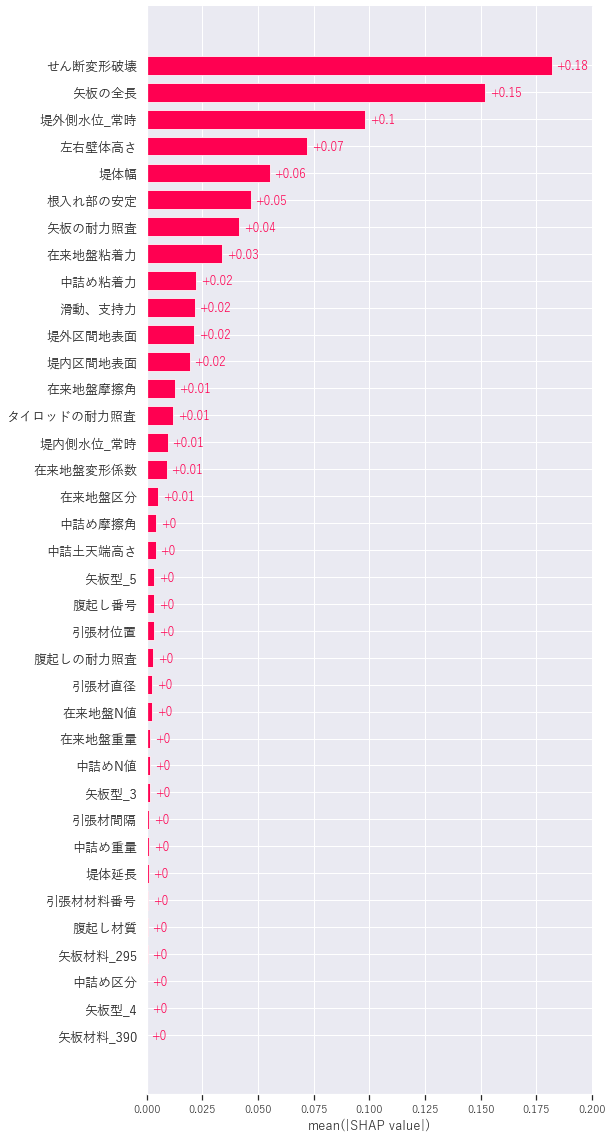

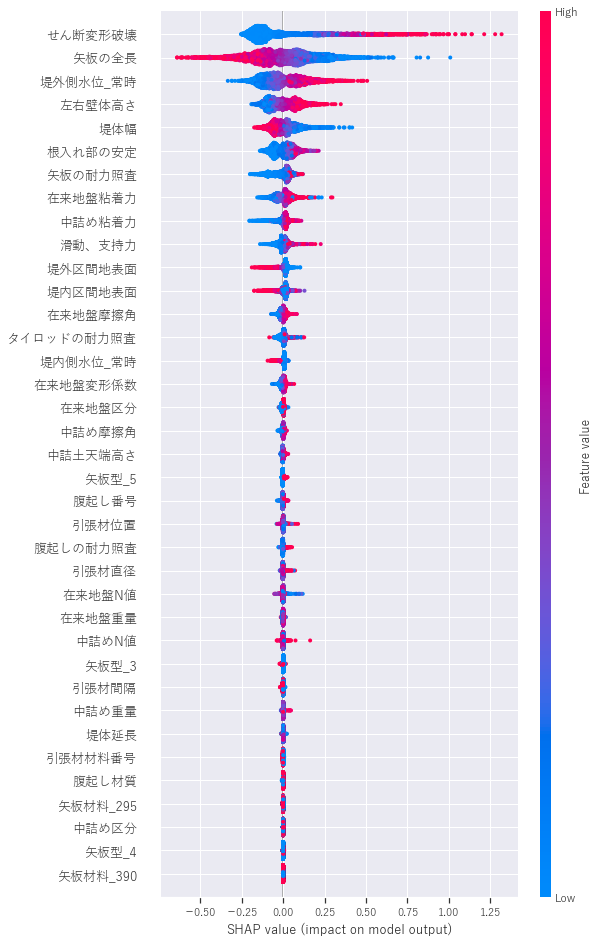

r2_train: 0.9838531758982858
r2_val: 0.8808482744006434
MAE_val:  0.08715525473427344
平均のMAE：0.08819109140968376


In [100]:
oof,models = fit_xgb(X, y, kf_cv, xgb_params)

### テストデータ

In [23]:
X_test = test.drop([pur], axis=1)
y_test = test[pur]

In [88]:
# from sklearn.metrics import average_precision_score,mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

def inference_xgb(models):
    # testデータに対して推論を行う
    X_test = test.drop([pur], axis=1)
    y_test = test[pur]

    pred_test = np.zeros((5,len(y_test))) # 320×6の2次元配列を作成
    r2 = []

    for i,model in enumerate(models):
        pred_test[i] = model.predict(X_test)/5
        r2.append(model.score(X_test, y_test))
    pred_test = np.sum(pred_test, axis=0) 

    print('MAE_test: ',mean_absolute_error(y_test, pred_test))
    print('r2_test_average:',np.mean(r2))

    return pred_test,X_test,y_test

In [89]:
pred_test,X_test,y_test = inference_xgb(models)

MAE_test:  0.0773509907004246
r2_test_average: 0.8719858536639482


### 全体の確認

In [90]:
train["predict"] = oof
train

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390,predict
7109,22,6.9,2.8,2.7,0.0,0.4,1.6,16,0,9,23,134,96800,13,0,19,26,...,0.0,0.001200,0.015292,0.001000,0.070352,0.000000,0.000000,0.000000,9.1,0.7,8,0,1,0,0,1,0.039690
4291,24,7.0,2.2,2.1,0.0,0.1,0.8,15,0,2,40,216,63900,13,0,39,24,...,0.0,0.002000,0.016545,0.001000,0.266565,0.011111,0.023256,0.007143,8.5,0.8,5,0,0,1,1,0,0.253093
2105,18,8.5,6.6,6.5,1.7,0.0,0.8,15,0,5,5,240,64600,13,0,39,14,...,0.0,0.028839,0.059318,0.075235,1.121795,0.061111,0.009804,0.007143,7.9,5.4,1,0,1,0,1,0,1.164789
2942,17,2.6,9.6,9.5,0.0,4.3,1.6,17,1,17,12,128,130100,17,0,12,5,...,0.1,0.001200,0.124870,0.039216,0.191571,0.000000,0.000000,0.000000,16.2,6.9,6,1,0,0,1,0,0.358503
1931,19,4.8,7.8,7.7,2.3,0.0,1.6,19,0,43,16,84,134500,15,0,43,17,...,0.0,0.631579,0.329670,0.155844,1.228070,0.114894,0.107843,0.035714,13.5,3.2,9,1,0,0,0,1,1.267033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,10,10.0,8.1,8.0,3.9,0.0,0.8,14,1,23,6,123,122500,20,1,15,31,...,0.0,0.105634,0.185471,0.124069,0.702811,0.466667,0.162791,0.151351,14.6,5.4,1,0,1,0,1,0,0.687884
2707,20,11.8,5.2,5.1,0.8,0.0,1.6,19,0,1,29,235,135300,18,0,34,39,...,0.0,0.001200,0.015353,0.001000,0.195859,0.011111,0.009804,0.005405,13.2,2.1,9,0,0,1,1,0,0.202892
6400,15,4.5,6.5,6.4,0.1,0.0,1.6,17,0,20,10,98,2700,19,1,5,5,...,0.0,0.681818,0.272727,0.163934,1.008646,1.022222,1.790698,0.414286,14.1,3.6,10,0,1,0,1,0,1.043332
1688,27,7.2,2.0,1.9,0.5,0.0,1.6,16,1,30,28,229,22900,15,0,36,12,...,0.0,0.001200,0.004849,0.001000,0.199203,0.005556,0.011628,0.005405,4.3,1.4,5,0,1,0,1,0,0.273219


In [91]:
test["predict"] = pred_test
test

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390,predict
8692,16,7.1,6.9,6.8,0.0,3.1,0.8,17,1,8,19,163,121300,16,1,49,8,...,0.2,0.001200,0.041537,0.016200,0.038602,0.000000,0.000000,0.000000,15.4,4.9,5,0,1,0,1,0,0.115813
6773,28,2.4,4.8,4.7,0.0,1.0,1.6,14,1,42,3,80,31900,18,1,6,28,...,0.4,0.001200,0.179910,0.029297,0.361944,0.005556,0.000000,0.007143,8.9,1.8,1,1,0,0,1,0,0.362273
451,13,2.1,5.7,5.6,0.0,1.4,1.6,18,0,36,22,263,20100,14,0,34,33,...,1.1,0.001200,0.058480,0.026864,0.555556,0.094444,0.069767,0.010811,15.6,4.2,7,1,0,0,1,0,0.619501
368,29,9.1,7.2,7.1,0.0,3.0,0.8,15,1,8,17,121,62700,12,1,27,8,...,0.7,0.001200,0.061193,0.034570,0.339476,0.000000,0.000000,0.000000,9.4,3.2,7,0,1,0,1,0,0.324059
1682,23,5.3,5.3,5.2,1.2,0.0,1.6,11,0,36,21,74,44400,16,1,29,10,...,0.0,0.104803,0.244898,0.130435,0.702811,0.072222,0.081395,0.028571,13.5,4.9,5,0,0,1,1,0,0.677873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,18,6.2,9.6,9.5,0.0,1.9,0.8,11,0,38,15,79,26500,15,1,43,38,...,1.5,0.205832,0.160000,0.065531,1.502146,0.106383,0.116279,0.007143,11.6,8.7,5,1,0,0,1,0,1.587321
6171,19,12.2,4.7,4.6,1.7,0.0,1.6,19,1,43,37,184,189500,12,1,14,18,...,0.0,0.008123,0.017994,0.001000,0.292887,0.008511,0.072727,0.014286,10.9,1.9,2,0,0,1,0,1,0.316904
582,24,10.7,5.9,5.8,0.5,0.0,0.8,15,0,42,1,131,180500,16,0,24,11,...,0.0,0.011992,0.124352,0.085409,0.588235,0.021277,0.034884,0.021622,12.2,1.2,2,0,0,1,0,1,0.518499
3140,16,4.2,4.2,4.1,1.6,0.0,0.8,11,1,2,11,284,32300,19,0,26,6,...,0.0,0.059026,0.043541,0.016162,0.691700,0.055556,0.009804,0.007143,9.4,2.3,7,0,0,1,1,0,0.771984


In [92]:
df_pred = pd.concat([train,test])
df_pred = df_pred.sort_index()
df_pred

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,...,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板の全長,引張材位置,腹起し番号,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390,predict
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,...,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,6.9,0.5,6,1,0,0,0,1,0.102364
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,...,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,12.0,5.7,5,0,1,0,0,1,0.771024
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,...,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,13.3,7.1,1,0,0,1,0,1,1.453709
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,...,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,12.4,4.9,3,1,0,0,1,0,0.303295
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,...,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,15.7,2.7,2,1,0,0,0,1,0.624635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,25,9.2,8.1,8.0,2.3,0.0,1.6,18,1,38,12,96,75100,13,0,1,43,...,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,10.9,7.5,4,1,0,0,1,0,0.453207
8924,29,10.4,5.4,5.3,1.5,0.0,0.8,12,1,48,26,134,15200,14,1,12,36,...,0.0,0.004561,0.033315,0.015364,0.250896,0.038298,0.000000,0.000000,14.1,4.3,3,1,0,0,0,1,0.303957
8925,19,7.7,4.2,4.1,1.6,0.0,1.6,15,0,32,40,270,194100,11,1,19,3,...,0.0,0.020281,0.027162,0.014428,0.384615,0.022222,0.023256,0.007143,13.2,3.0,6,0,1,0,1,0,0.429186
8926,11,11.5,4.3,4.2,1.6,0.0,0.8,18,1,12,37,85,14400,12,1,2,26,...,0.0,0.011119,0.048622,0.019118,0.371156,0.066667,0.078431,0.014286,11.9,2.0,4,0,0,1,1,0,0.357978


## 予測結果の可視化

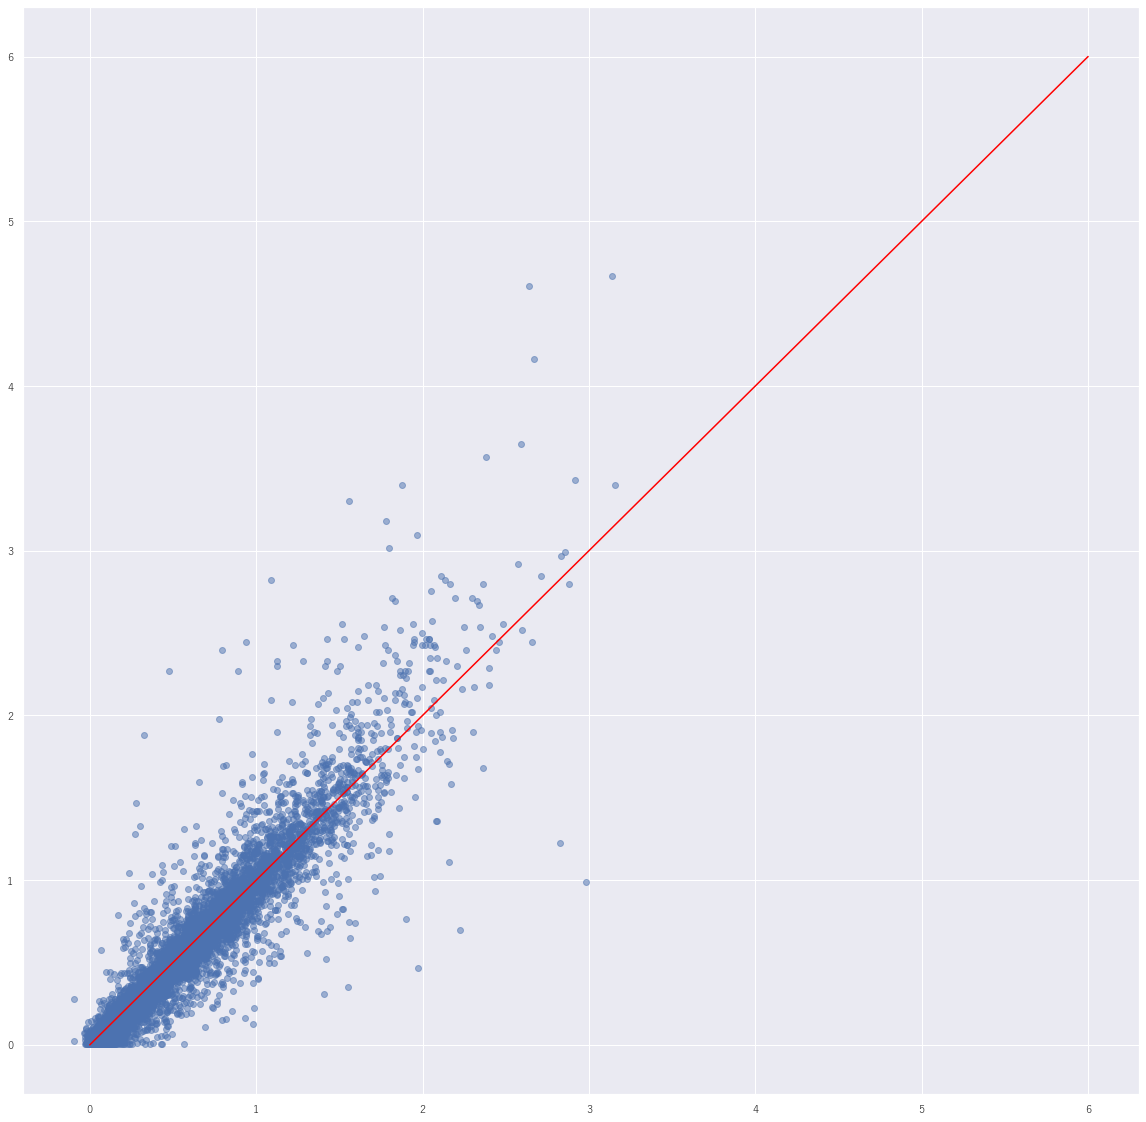

In [98]:
#x軸が予測値，y軸が結果
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df_pred["predict"],df_pred[pur], alpha = 0.5)
plt.plot(np.linspace(0, 6, 6), np.linspace(0, 6, 6), "red")
plt.show()

###  特徴量重要度

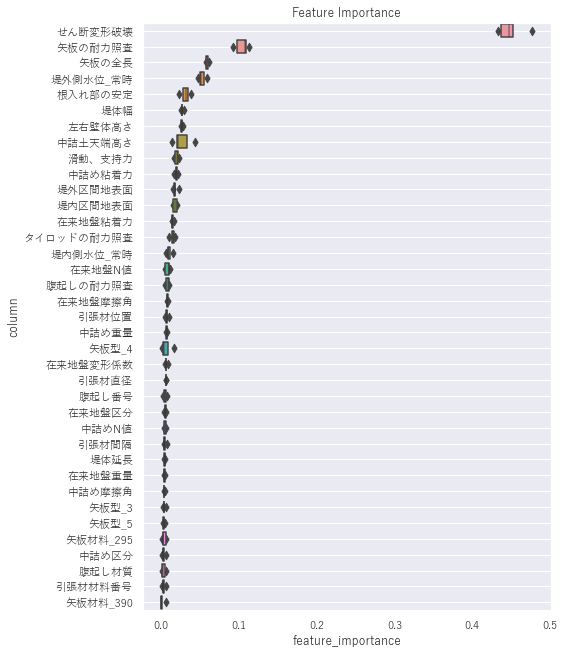

In [94]:
# 5つのモデルで重要度が出てくるので箱ひげ図にします、
def plot_importance(model, X):
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["feature_importance"] = model.feature_importances_
        _df["column"] = X.columns
        _df["fold"] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby("column").sum()[["feature_importance"]].sort_values("feature_importance", ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x="feature_importance", 
                  y="column", 
                  order=order, 
                  ax=ax, 
                  palette=None,  
                  orient="h")
    ax.tick_params(axis="x")
    ax.set_title("Feature Importance")
    ax.grid()
    fig.tight_layout()
    return fig, ax

fig, ax = plot_importance(models, X)

### shap値個々の値についてしらべる

In [102]:
def shap_part(val):
    X_predict = df_pred.drop([pur,"predict"], axis=1)
    y_predict = df_pred[pur] 

    for model in models:
        explainer = shap.TreeExplainer(model = model,data=X_predict,feature_perturbation="interventional")
        shap_values = explainer(X_predict)
        shap.plots.waterfall(shap_values=shap_values[val],max_display=20)

100%|===================| 8894/8928 [00:26<00:00]        

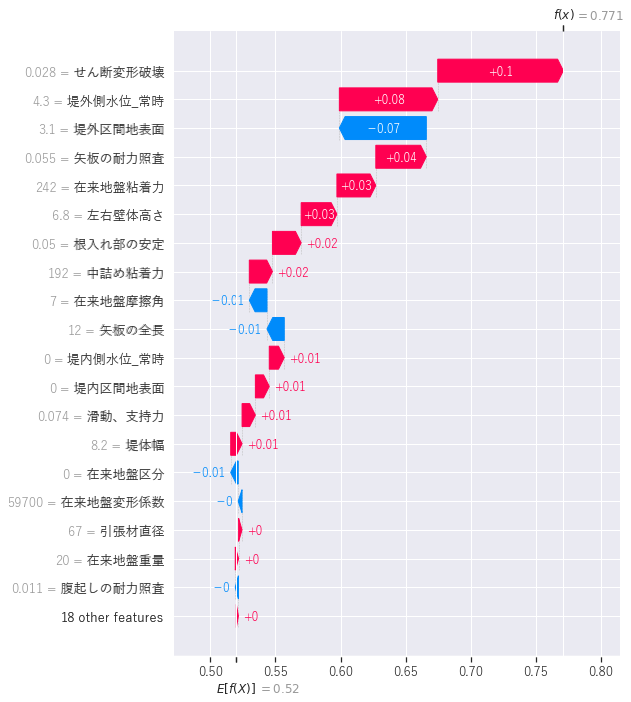

 97%|=================== | 8636/8928 [00:25<00:00]       

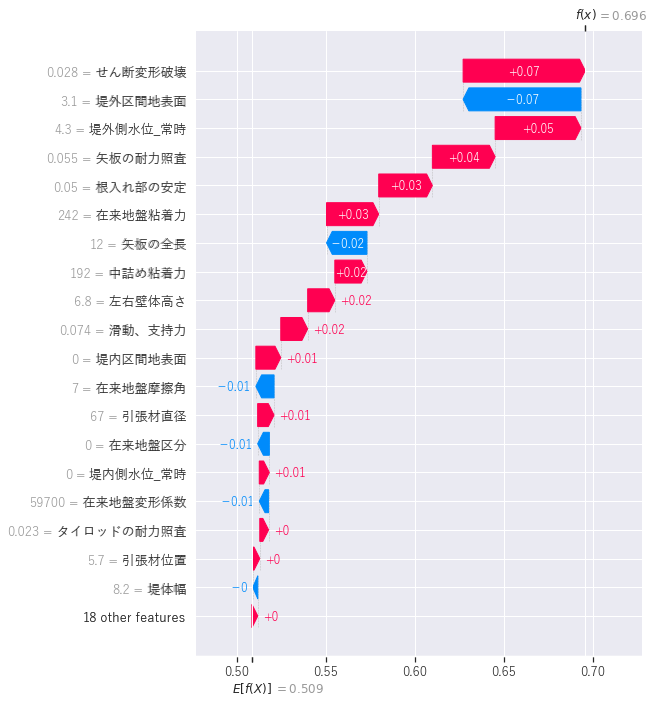

 99%|===================| 8798/8928 [00:26<00:00]        

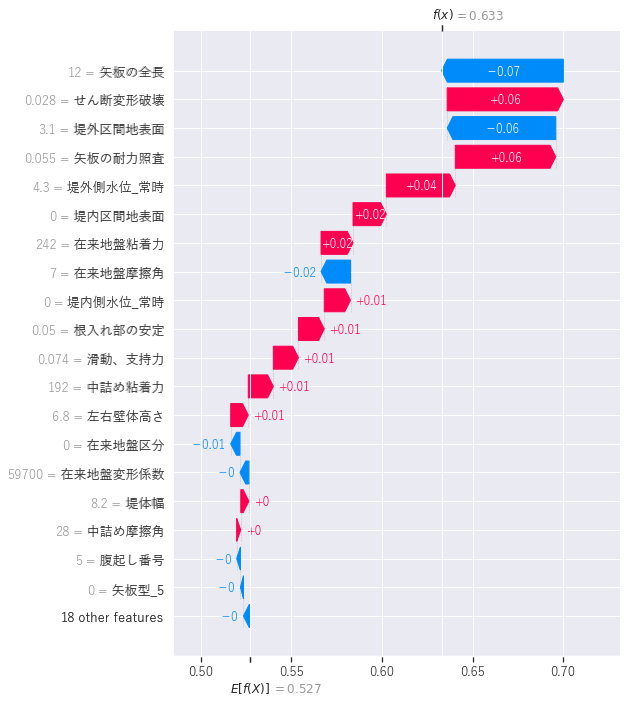

 97%|=================== | 8693/8928 [00:26<00:00]       

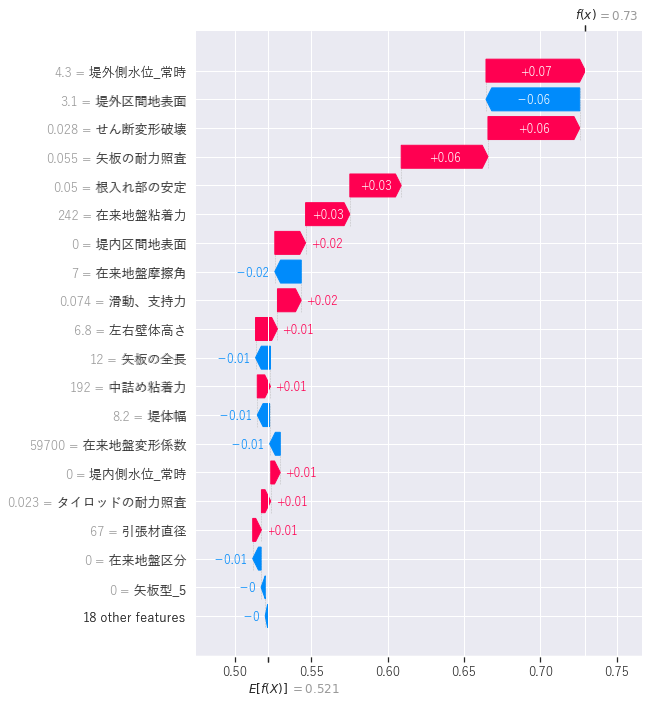

 97%|=================== | 8695/8928 [00:27<00:00]       

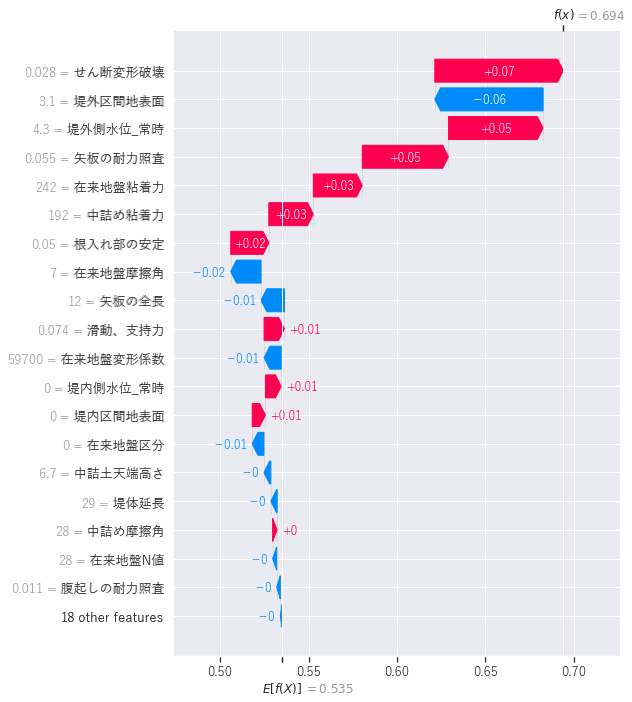

In [101]:
#引数にはデータの何番目の値の詳細を見たいかをいれる．
#モデルごとにwaterfall図が出る．モデルによって異なる．
#f(x):モデルの予測値
#E[f(x)]:モデル予測値全体の平均
shap_part(1)